### Skript to Visualize 
package mathplotlip 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import common_paths
import pandas as pd
import numpy as np

In [2]:
#area.to_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_number = pd.read_csv(common_paths.DATA.joinpath("dwd/nr_Brandenburg.csv"))
df_area   = pd.read_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_predict = pd.read_csv(common_paths.DATA.joinpath("dwd/final_predictions.csv"))
df_predict['time_in_months'] = df_predict['Year'] + (df_predict['Month'] - 1) / 12

df_number['time_in_months'] = df_number['Year'] + (df_number['Month'] - 1) / 12
df_area['time_in_months'] = df_area['Year'] + (df_area['Month'] - 1) / 12
df_hist = df_number.merge(df_area[['Year', 'Month', 'area']], on=['Year', 'Month'], how='left')
df_hist = df_hist[df_hist['Year'] > 1995]

In [3]:
# to show datasets
#df_predict
#df_area
#df_number.nFires.values.tolist()
df_predict


,Unnamed: 0,Year,Month,tasmax,sfcWind,pr,area_predictions,nr_predictions,time_in_months
0,0,2024,1,277.818281,4.376295,51.553847,0.270256,0.211310,2024.000000
1,1,2024,2,275.542922,3.763572,13.482759,4.274414,1.237931,2024.083333
2,2,2024,3,282.054063,4.178627,21.255087,0.308581,0.261001,2024.166667
3,3,2024,4,290.934900,3.595162,20.208205,12.300988,12.345164,2024.250000
4,4,2024,5,294.976148,2.951547,47.807941,5.022404,8.041631,2024.333333
...,...,...,...,...,...,...,...,...,...
356,356,2053,9,295.810764,2.768496,16.893846,21.231409,47.769851,2053.666667
357,357,2053,10,285.987099,3.775451,48.880397,0.270256,0.274363,2053.750000
358,358,2053,11,278.810097,3.910427,76.919488,0.270256,0.211310,2053.833333
359,359,2053,12,272.485429,3.304169,27.871464,0.270256,0.211310,2053.916667


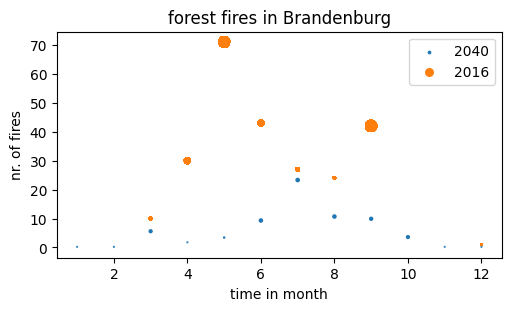

In [4]:
def compare_years(df_hist, df_predict, year_hist, year_future):
    # TODO usea real error exception
    # change month from number to strings eg. january, feburary etc. 
    # change function to compare multiple years 
    if(year_hist < 1996 or year_hist > 2022):
        print("Error: Historical dates range only from 1996 to 2022")
        return
    if(year_future < 2024 or year_future > 2053):
        print("Error: Prediction dates range only from 2024 to 2053")
        return
    df_hist_year = df_hist[df_hist['Year'] == year_hist]
    df_predict_year = df_predict[df_predict['Year'] == year_future]
    
    # real names datasets ? 
    fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
    ax.scatter('Month', 'nr_predictions', s='area_predictions', data = df_predict_year, label= year_future)
    ax.scatter('Month', 'nFires', s='area', data = df_hist_year, label=year_hist)
    ax.set_title('forest fires in Brandenburg')
    ax.set_xlabel('time in month')
    ax.set_ylabel('nr. of fires')#
    ax.legend()
    # potentially for loop to compare as many years to each other as you want

compare_years(df_hist, df_predict, 2016, 2040)
# Scatter Plot of fires 


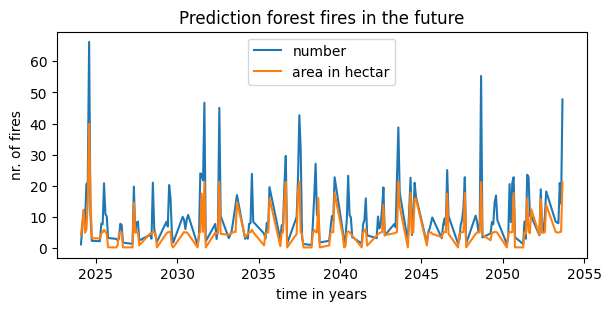

In [5]:
# Plot to determine Predictions 
# TODO decide wheter labels on axis or legend
# 2nd y-axis for area


#slice zero points out of the dataset
df_predict_nozero = df_predict[df_predict['nr_predictions'] > 1]
df_predict_nozero = df_predict_nozero[df_predict_nozero['area_predictions'] > 0.1]
#print(df_predict_nozero['area_predictions'].values.tolist())
fig, ax = plt.subplots(figsize=(6,3), layout='constrained')
ax.plot('time_in_months', 'nr_predictions', data=df_predict_nozero, label="number")
ax.plot('time_in_months', 'area_predictions', data=df_predict_nozero, label="area in hectar")
ax.set_title('Prediction forest fires in the future')
ax.set_xlabel('time in years')
ax.set_ylabel('nr. of fires')
ax.legend()
plt.show()

[4.27441399093919, 12.300988493157243, 5.0224044767187355, 5.925067840518467, 14.32736297590089, 39.94413643289801, 16.106963160658125, 3.2553704205624574, 3.1554448867854634, 4.834142151218486, 5.125990561392782, 5.925067840518467, 5.322851633583011, 4.638284898948148, 0.3138127177799709, 0.2818319640329129, 0.9322056712340836, 4.60277065383084, 5.125990561392782, 5.125990561392782, 0.2818319640329129, 0.3085812039633075, 14.600351350985592, 5.0224044767187355, 5.045545007867904, 5.125990561392782, 0.9322056712340836, 4.761098519641677, 4.638284898948148, 5.278149078742564, 5.0224044767187355, 4.60277065383084, 0.2818319640329129, 4.761098519641677, 5.125990561392782, 5.278149078742564, 5.278149078742564, 0.9322056712340836, 0.2818319640329129, 4.638284898948148, 5.242406080058133, 5.045545007867904, 5.125990561392782, 4.638284898948148, 0.2702556229632007, 4.615325995699812, 5.278149078742564, 17.557013630409, 5.278149078742564, 21.231408896797586, 0.2818319640329129, 5.0224044767187

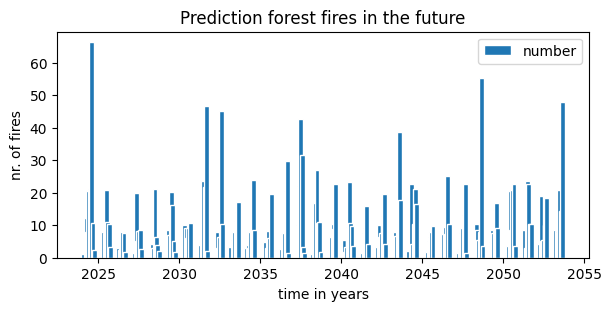

In [6]:
# Prediction in bar diagramm 
#slice zero points out of the dataset
df_predict_nozero = df_predict[df_predict['nr_predictions'] > 1]
df_predict_nozero = df_predict_nozero[df_predict_nozero['area_predictions'] > 0.1]
print(df_predict_nozero['area_predictions'].values.tolist())
fig, ax = plt.subplots(figsize=(6,3), layout='constrained')
ax.bar('time_in_months', 'nr_predictions', data=df_predict_nozero, label="number", edgecolor="white", width=0.3)
#ax.bar('time_in_months', 'area_predictions', data=df_predict_nozero, label="area in hectar", width=0.3, edgecolor="white")
ax.set_title('Prediction forest fires in the future')
ax.set_xlabel('time in years')
ax.set_ylabel('nr. of fires')
ax.legend()
plt.show()

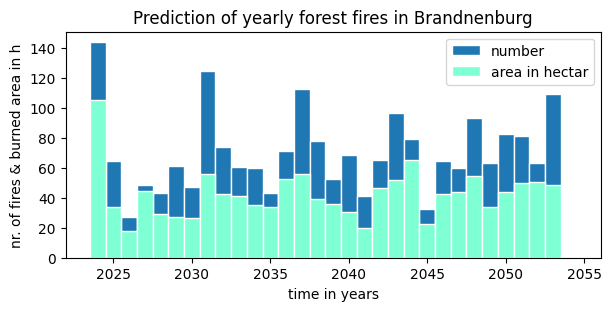

In [7]:
df_predict_avg = df_predict.groupby('Year')[['nr_predictions', 'area_predictions']].sum().reset_index()

fig, ax = plt.subplots(figsize=(6,3), layout='constrained')
ax.bar('Year', 'nr_predictions', data=df_predict_avg, label="number", edgecolor="white", width=1)
ax.bar('Year', 'area_predictions', data=df_predict_avg, label="area in hectar", width=1, edgecolor="white", color="aquamarine")
ax.set_title('Prediction of yearly forest fires in Brandnenburg')
ax.set_xlabel('time in years')
ax.set_ylabel('nr. of fires & burned area in h')
ax.legend()
plt.show()

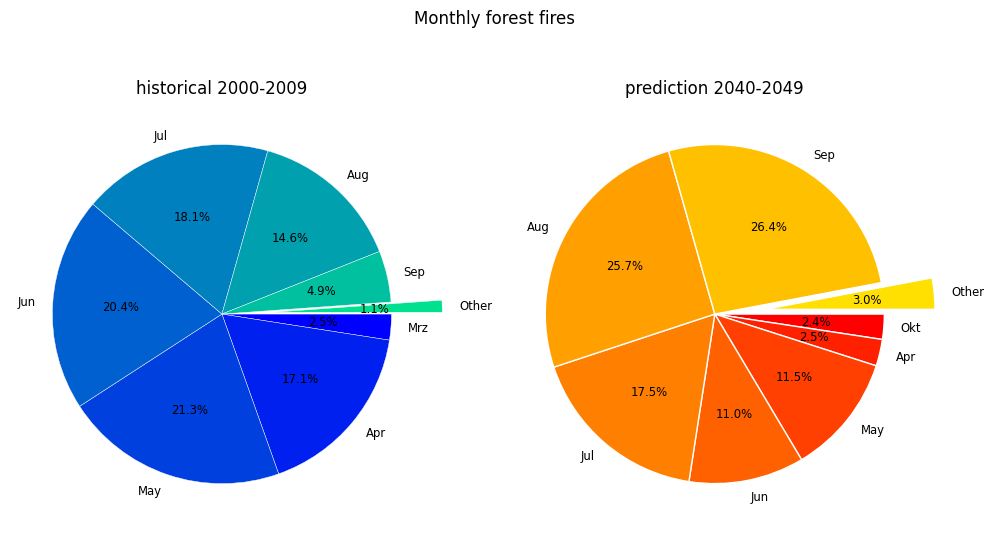

In [8]:
# TODO match colors 

#data compare Months 
# cant use sel cuz dataframe not dataset :( 
#2000 - 2009
df_2000 = df_hist[(df_hist['Year'] > 1999) & (df_hist['Year'] < 2010) ]
df_2000 = df_2000.groupby('Month')[['nFires', 'area']].mean().reset_index()

df_2040 = df_predict[(df_predict['Year'] > 2039) & (df_predict['Year'] < 2050)]
df_2040 = df_2040.groupby('Month')[['nr_predictions', 'area_predictions']].mean().reset_index()


#Combine Month with very low nr to Other
df_2040['Month'] = df_2040['Month'].apply(lambda x: 'Other' if df_2040.loc[df_2040['Month'] == x, 'nr_predictions'].values[0] < 1.2 else str(x))
df_2040 = df_2040.groupby('Month')[['nr_predictions', 'area_predictions']].sum().reset_index()


df_2000['Month'] = df_2000['Month'].apply(lambda x: 'Other' if df_2000.loc[df_2000['Month'] == x, 'nFires'].values[0] < 2.6 else str(x))
df_2000 = df_2000.groupby('Month')[['nFires', 'area']].sum().reset_index()


cmap_2000 = plt.get_cmap("winter")
cmap_2040 = plt.get_cmap("autumn")

#map colors
colors_2000 = [cmap_2000(i/len(df_2000)) for i in range(len(df_2000))]
colors_2040 = [cmap_2040(i/len(df_2040)) for i in range(len(df_2040))]

#hardcoded right labels
labels_2040 = 'Okt','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Other'
labels_2000 = 'Mrz','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Other'

#explode Other
ax1explode = [0.3 if label == 'Other' else 0 for label in df_2040['Month']]
ax2explode = [0.3 if label == 'Other' else 0 for label in df_2040['Month']]



fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
ax1.pie('nFires', data=df_2000, autopct='%1.1f%%', explode= ax1explode, textprops={'size': 'smaller'},  
       wedgeprops={"linewidth": 0.3, "edgecolor": "white"}, frame=False, colors= colors_2000, labels=labels_2000, startangle=0, counterclock=False)
ax1.set_title("historical 2000-2009")
ax2.pie('nr_predictions', data=df_2040, autopct='%1.1f%%', explode=ax2explode, textprops={'size': 'smaller'},
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False, colors= colors_2040, labels=labels_2040, counterclock=False)
ax2.set_title("prediction 2040-2049")

fig.suptitle('Monthly forest fires')
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 356
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        185 non-null    int64  
 1   Year              185 non-null    int64  
 2   Month             185 non-null    int64  
 3   tasmax            185 non-null    float64
 4   sfcWind           185 non-null    float64
 5   pr                185 non-null    float64
 6   area_predictions  185 non-null    float64
 7   nr_predictions    185 non-null    float64
 8   time_in_months    185 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 14.5 KB
None


Text(0, 0.5, 'number of fires')

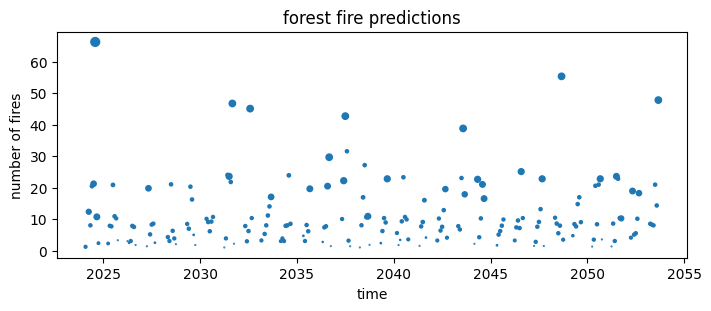

In [9]:
# delete Zero values -> less points in graph
df_predict_nozero = df_predict[df_predict['nr_predictions'] > 1]
# print(df_predict_nozero.info())
fig, ax = plt.subplots(figsize=(7, 3), layout='constrained')
ax.scatter('time_in_months', 'nr_predictions', s='area_predictions', data = df_predict_nozero)
#ax.scatter('time_in_months', 'nFires', s='area', data=df_number)
#x.scatter(data=)
ax.set_title('forest fire predictions')
ax.set_xlabel('time')
ax.set_ylabel('number of fires')

#df_predict_year = df_predict_year[df_predict['nr_predictions'] > 1]
    #df_hist_year = df_predict_year[df_predict['nr_predictions'] > 1]